In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = fetch_openml('mnist_784')
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = data['data']
y = data['target'].astype(int)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [6]:
print(f"The last training sample is of digit {y_train.iloc[-1]}.")

The last training sample is of digit 0.


In [7]:
digit_6_train_indices = np.where(y_train == 6)[0]
digit_9_train_indices = np.where(y_train == 9)[0]

In [8]:
X_train_6 = X_train.iloc[digit_6_train_indices, :]
X_train_9 = X_train.iloc[digit_9_train_indices, :]
X_train_69 = pd.concat([X_train_6, X_train_9])
X_train_69

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
63939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train_69 = pd.concat([pd.Series([1] * len(digit_6_train_indices)), pd.Series([0] * len(digit_9_train_indices))])
y_train_69

0       1
1       1
2       1
3       1
4       1
       ..
4863    0
4864    0
4865    0
4866    0
4867    0
Length: 9656, dtype: int64

In [10]:
X_train_69, y_train_69 = shuffle(X_train_69, y_train_69, random_state=1729)

In [11]:
digit_6_test_indices = np.where(y_test == 9)[0]
digit_9_test_indices = np.where(y_test == 9)[0]

In [12]:
X_test_6 = X_test.iloc[digit_6_test_indices, :]
X_test_9 = X_test.iloc[digit_9_test_indices, :]
X_test_69 = pd.concat([X_test_6, X_test_9])
X_test_69

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
31524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_test_69 = pd.concat([pd.Series([1]*len(digit_6_test_indices)), pd.Series([0] * len(digit_9_test_indices))])
y_test_69

0       1
1       1
2       1
3       1
4       1
       ..
2085    0
2086    0
2087    0
2088    0
2089    0
Length: 4180, dtype: int64

In [14]:
print("Number of value 1 train:", y_train_69.sum())
print("Number of value 1 test:", y_test_69.sum())

Number of value 1 train: 4788
Number of value 1 test: 2090


In [15]:
scaler = StandardScaler()
X_train_69Tf = scaler.fit_transform(X_train_69)

In [16]:
mean_zeroth_sample = X_train_69Tf[0].mean()
mean_zeroth_feature = X_train_69Tf[:, 0].mean()
std_zeroth_sample = X_train_69Tf[0].std()
std_zeroth_feature = X_train_69Tf[:, 0].std()

scaler_stats = (mean_zeroth_sample, mean_zeroth_feature, std_zeroth_sample, std_zeroth_feature)
scaler_stats

(0.11366902953286945, 0.0, 1.1035564638526854, 0.0)

In [17]:
def train_sgd_classifier(lr):

    clf = SGDClassifier(
        loss = 'log_loss',
        learning_rate = 'constant',
        eta0 = lr,
        max_iter = 1,
        warm_start = True,
        random_state = 10,
        shuffle = True,
        n_jobs = -1
    )
    loss_history = []

    for _ in range(10):
        clf.fit(X_train_69Tf, y_train_69)

        probabilities = clf.predict_proba(X_train_69Tf)[:, 1]

        loss = -np.mean(y_train_69 * np.log(probabilities) + (1 - y_train_69) * np.log(1 - probabilities))
        loss_history.append(loss)

    return loss_history

In [18]:
learning_rates = [0.01, 0.000001]
loss_histories = {}

In [19]:
for lr in learning_rates:
    loss_histories[lr] = train_sgd_classifier(lr)

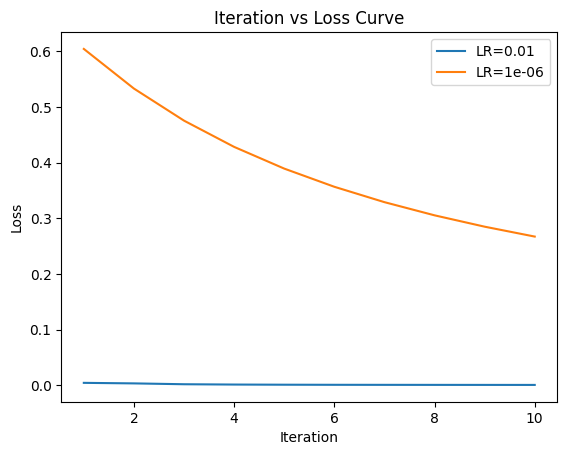

In [20]:
for lr, losses in loss_histories.items():
    plt.plot(range(1, 11), losses, label=f'LR={lr}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Iteration vs Loss Curve')
plt.show()